# STAT 301 Project Proposal

#### Group 40: Dorothy Ger, Ryan Peng, Sparsh Bajaj, Tony Liang

## 1. Introduction

### 1.1 Background Information on the topic

A motorized vehicle emits around 4.7 tons of carbon dioxide annually (US EPA 2016). To cut down on emissions, bike sharing systems, an innovation from traditional bike rentals, started to emerge as a method of eco-friendly transportation. More than 1000 cities worldwide have implemented a bicycle share program (Lin et al. 2018). From a business perspective, what are factors that effect the number of bicycle rentals became a research area of interest.

### 1.2 The Question

Using the programming language R as a tool for our analysis, we will be attempting to answer the research question: 

   > How are our predictor variables statistically significant for predicting the response variable?

**PHRASE THE QUESTION BETTER HERE PLEASE** ^


### 1.3 The Dataset

In this report, we will be working on a dataset named “Nike Sharing Dataset” from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset), which includes detailed data about rental bikes in Capital bikeshare system. This dataset contains columns with information of: hourly and daily count (`cnt`) of rental bikes, `dates`, `season`, `weather`, etc. We will be looking particularly at which columns can serve as input variables for a predictive model for **daily bike rental counts**. 



## 2. Preliminary Results

### 2.0 Load libraries 

In [1]:
# Load required libraries
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(httr)

Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### 2.1 Read data and Wrangling

We will first download a zip that contains both hourly and daily data of the bike sharing dataset, and use the **daily bike data** only as mentioned earlier from our introduction, and load it as dataframe. **Note**: The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [2]:
# Downloads zip to tempfile
BIKE_URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
GET(BIKE_URL, write_disk(tf <- tempfile(fileext = ".zip")))
# Unzip tempfile and disgards the hourly data and use daily only
bike_sharing_day <- read_csv(unz(tf, "day.csv"))
# Unlink/remove the temporary file
unlink(tf)
head(bike_sharing_day)

Response [https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip]
  Date: 2022-11-05 00:48
  Status: 200
  Content-Type: application/x-httpd-php
  Size: 280 kB
<ON DISK>  C:\Users\chunq\AppData\Local\Temp\RtmpI9mRHw\file8d044be61d8.zipNULL

Rows: 731 Columns: 16
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): instant, season, yr, mnth, holiday, weekday, workingday, weathers...
date  (1): dteday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


Before removing any columns, we are going to get some summary statistics of all variables to check how is the data distributed.

In [11]:
summary(bike_sharing_day)

    instant          dteday               season            yr        
 Min.   :  1.0   Min.   :2011-01-01   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   1st Qu.:2011-07-02   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   Median :2012-01-01   Median :3.000   Median :1.0000  
 Mean   :366.0   Mean   :2012-01-01   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   3rd Qu.:2012-07-01   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   Max.   :2012-12-31   Max.   :4.000   Max.   :1.0000  
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.000  
   weathersit         temp        

We noticed `temp`, `atemp`, `hum`, `windspeed` are all "normalized" variables given from the originial dataset description according to some transformations. Moreover, we have some time variables like: `weekday`, `mnth`, `dteday`, whereas we are going to discard these for easiness of modelling and not consider it at all when selecting variables. Also, according to the original dataset, we know that `cnt` = `casual` + `registered`, hence this could likely cause collinearity problem later, and we would only focus on `cnt` as a response variable. Also, similar variables like holiday, workingday might have similar issue, hence we would keep one of the two.

In [15]:
# Wrangling data
# Selecting relevant/meaningful columns
# Transform categorical variables to factors
bike_wrangled <- bike_sharing_day %>%
                 select(yr, workingday:windspeed, cnt) %>%
                 mutate(across(yr:weathersit, as.factor))
head(bike_wrangled, 6)

yr,workingday,weathersit,temp,atemp,hum,windspeed,cnt
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2,0.344167,0.363625,0.805833,0.1604460,985
0,0,2,0.363478,0.353739,0.696087,0.2485390,801
0,1,1,0.196364,0.189405,0.437273,0.2483090,1349
0,1,1,0.200000,0.212122,0.590435,0.1602960,1562
0,1,1,0.226957,0.229270,0.436957,0.1869000,1600
0,1,1,0.204348,0.233209,0.518261,0.0895652,1606


Next, we are also checking if there exist further collinearity problem in the remaining numeric variables by plotting a heat map of these predictors.

In [26]:
# This cell is to control plot size
options(repr.plot.width = 15, repr.plot.height = 15)

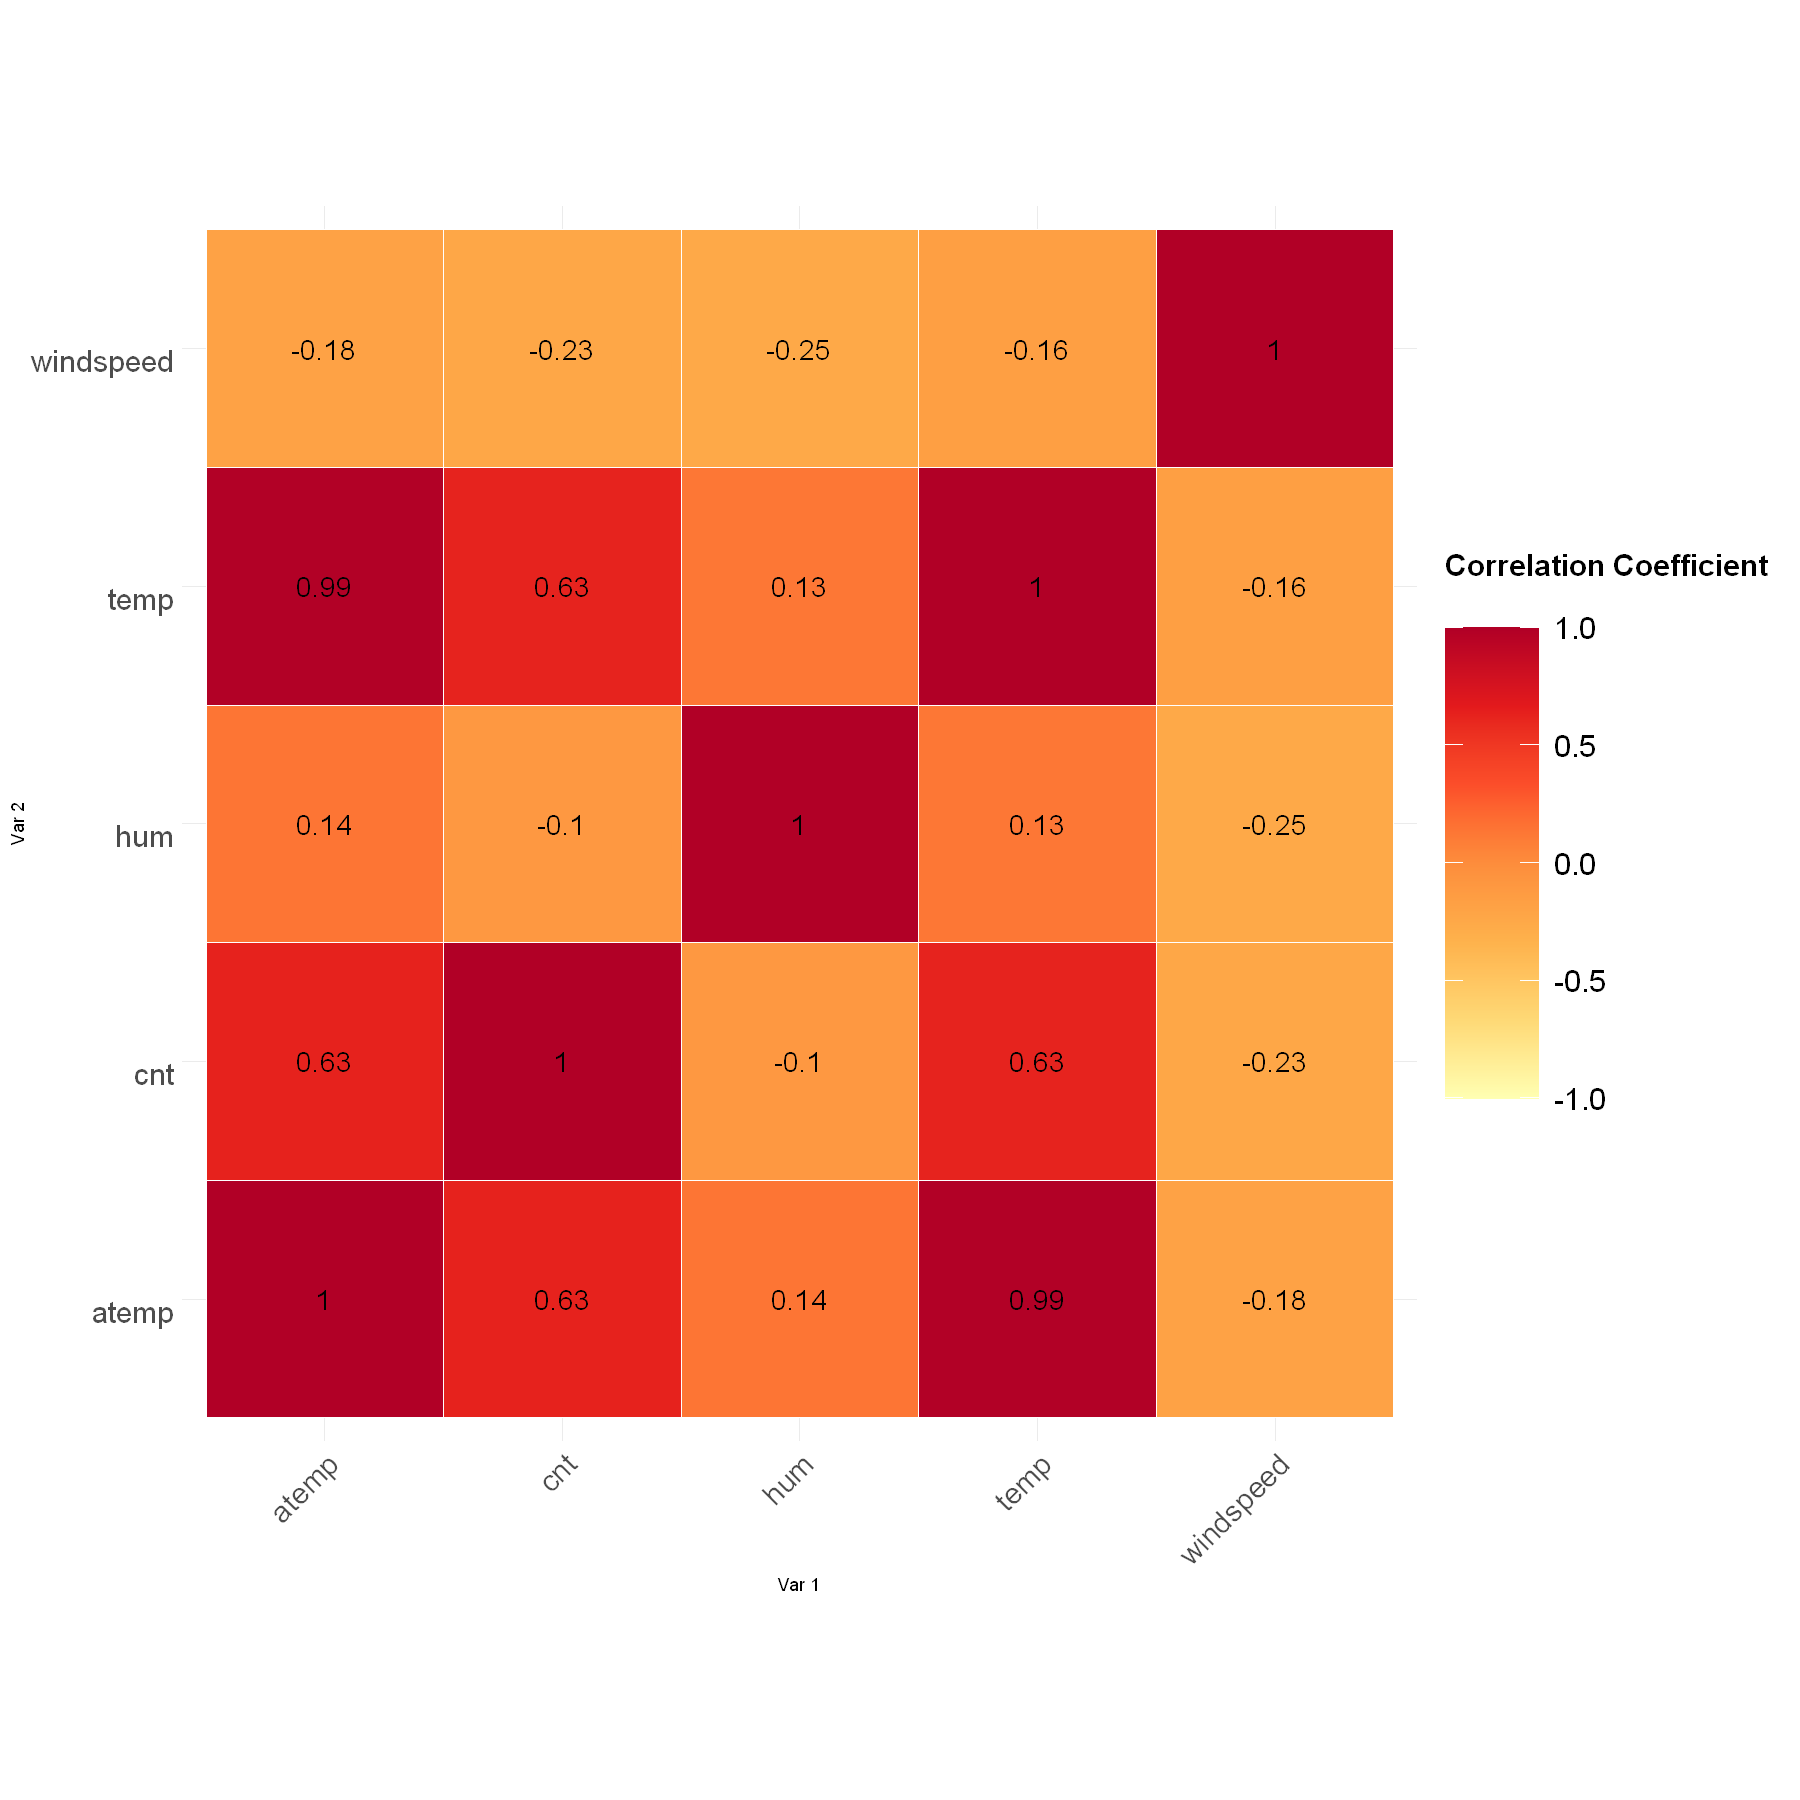

In [29]:
# Correlation marix of numeric predictors
corr_mat <- cor(bike_wrangled %>% select_if(is.numeric)) %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

# Plot heat map of correlation matrix
plot_corr_matrix <- corr_mat %>%
  ggplot(aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "Var 1", y = "Var 2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(x = var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix

We notice `temp` and `atemp`

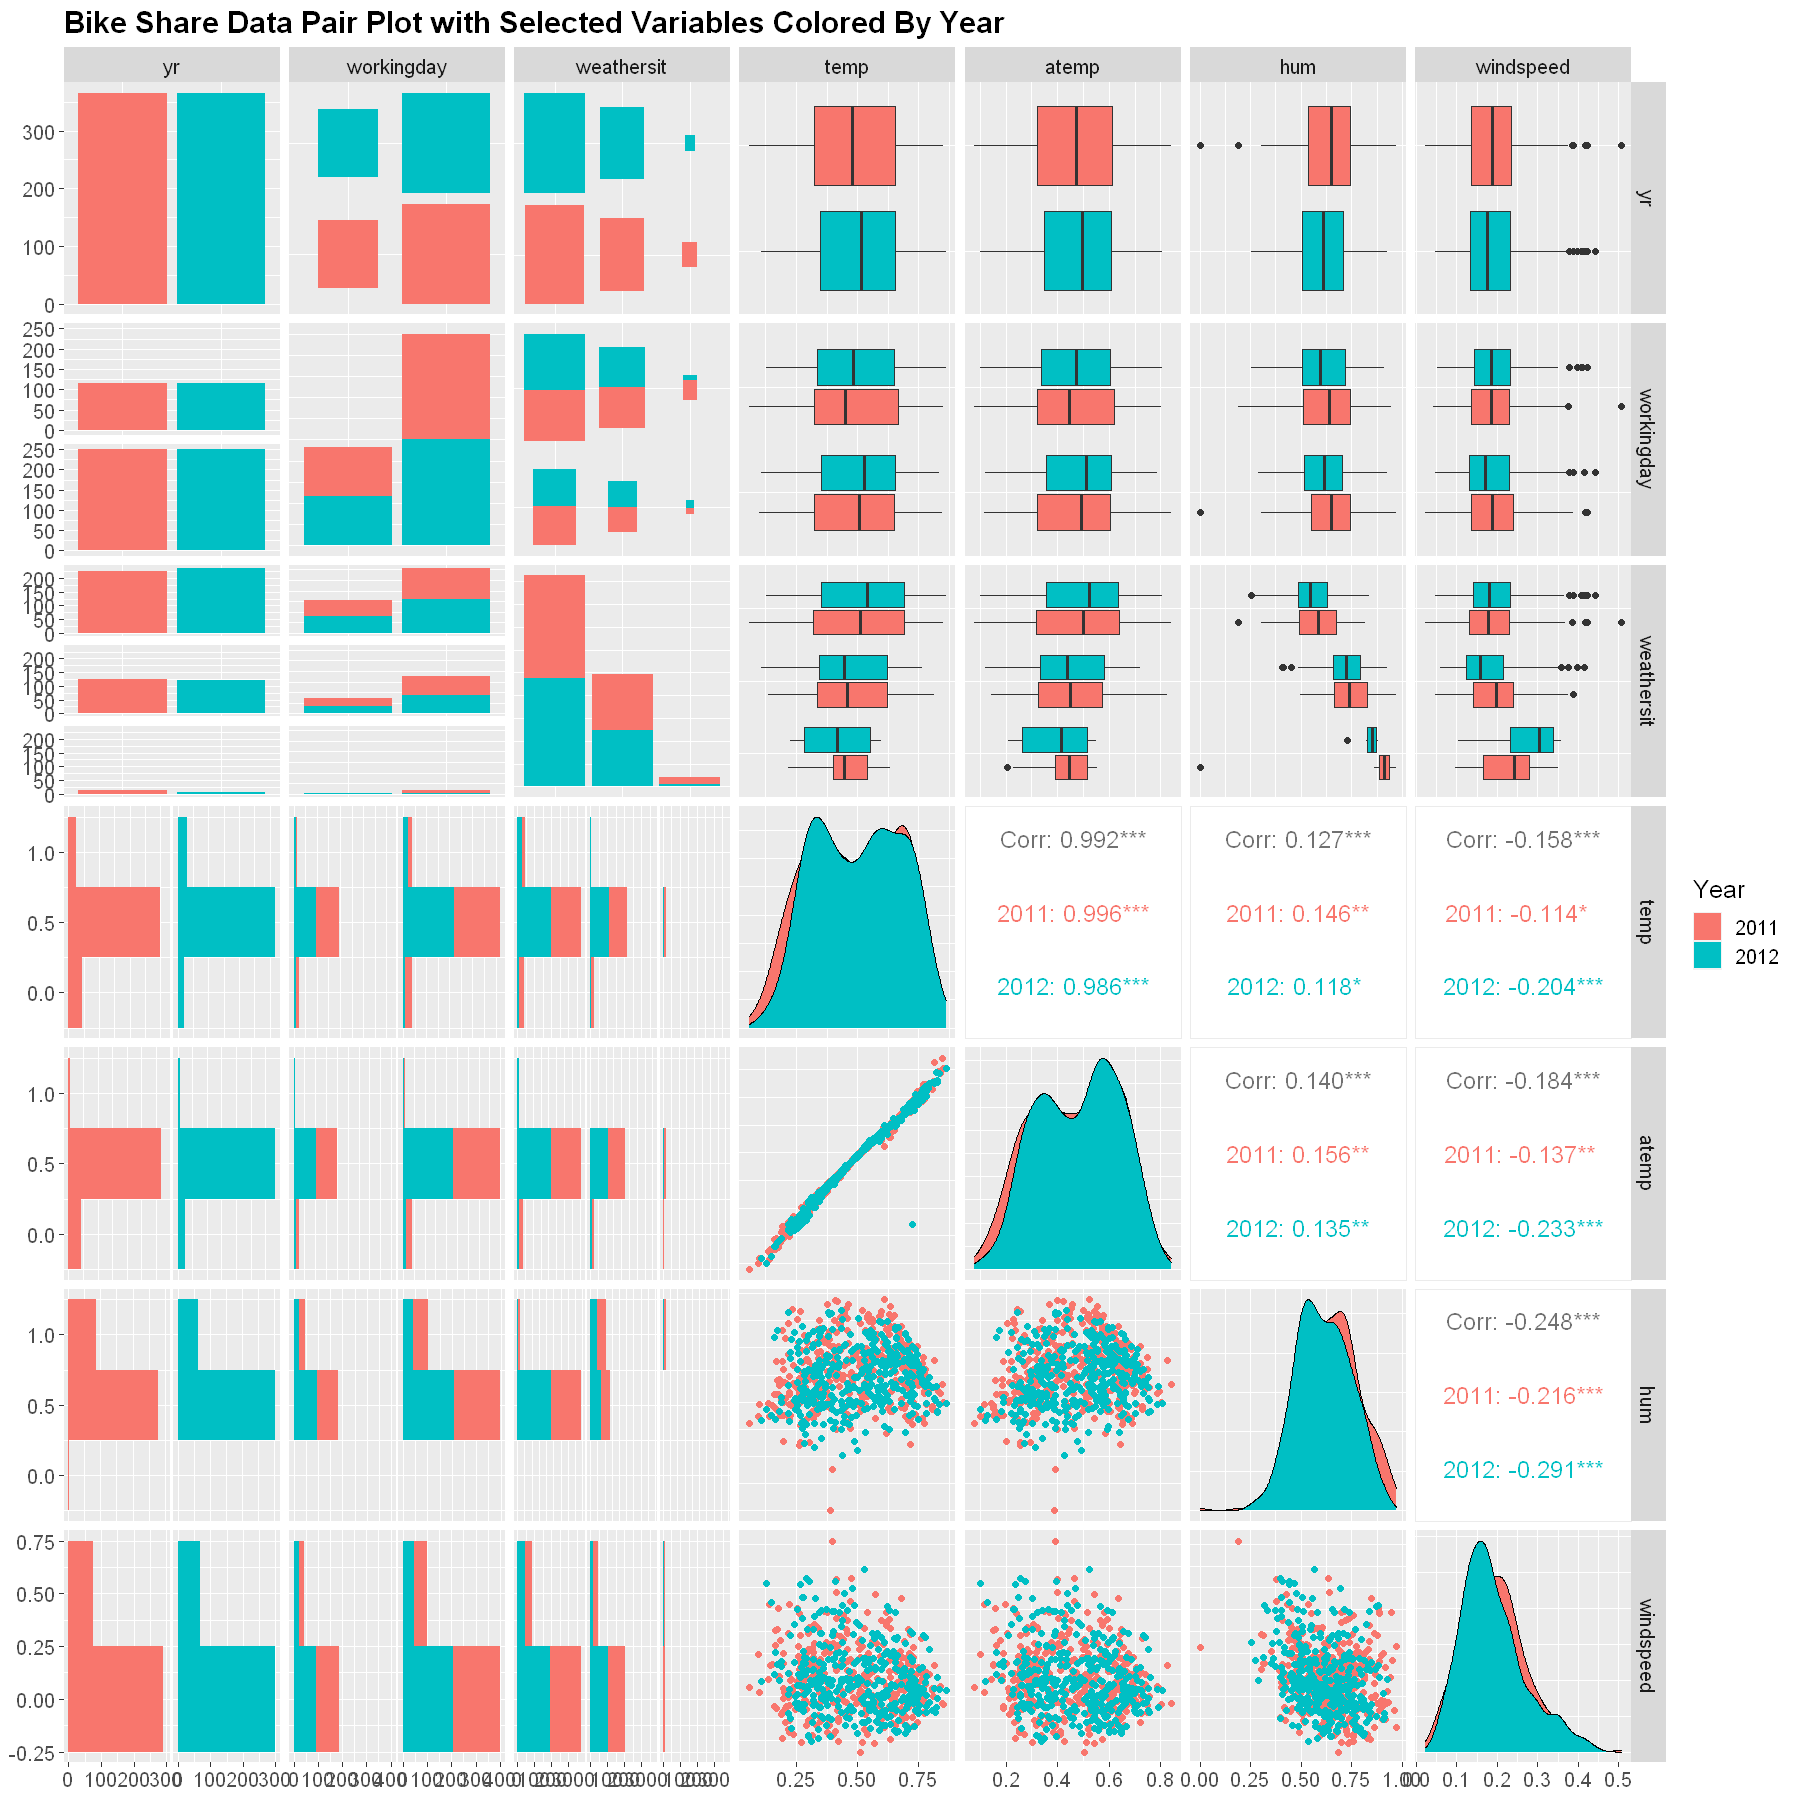

In [30]:
# Visualize the association between our variable of interest (season, workingday, weathersit, 
# temp, atemp, hum, windspeed, cnt)
bs_day_pair_plots <- bike_wrangled %>%
    ggpairs(progress = FALSE, legend = 1, columns = c(1,2,3,4,5,6,7), 
        aes(color = factor(yr, levels = 0:1, labels = c("2011", "2012"))),
        lower=list(combo=wrap("facethist", binwidth=0.5)),
        upper=list(continuous = wrap("cor", size=5))) +
    ggtitle("Bike Share Data Pair Plot with Selected Variables Colored By Year") +
    theme(
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    labs(fill = "Year")
bs_day_pair_plots

## 3. Methods

## 4. References

US EPA, O. (2016). *Greenhouse Gas Emissions from a Typical Passenger Vehicle*. US EPA. https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle-0

Lin, L., He, Z., & Peeta, S. (2018). *Predicting station-level hourly demand in a large-scale bike-sharing network: A graph convolutional neural network approach* Transportation Research. Part C, Emerging Technologies, 97, 258-276. https://doi.org/10.1016/j.trc.2018.10.011
